<a href="https://colab.research.google.com/github/Rajatkhatri7/Face-With-Yolo/blob/master/YOLOv3_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a YOLOv3 Object Detector with Darknet in the Cloud! (GPU ENABLED)
This will help you build YOLOv3 easily in the cloud with GPU enabled so that you can run real-time object detections as well as train your very own custom object detector!

**bold text**# Step 1: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.



In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14321, done.
remote: Total 14321 (delta 0), reused 0 (delta 0), pack-reused 14321
Receiving objects: 100% (14321/14321), 12.87 MiB | 25.79 MiB/s, done.
Resolving deltas: 100% (9772/9772), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 2: Download pretrained YOLOv3 weights(optional)

YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.
[COCO CLASSES](http://cocodataset.org/#explore)

We can run the yolov3 with its pretrained weights.
run the below code one by one for prediction with pretrained weights

```
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights
```

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
```
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
```

Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

In [6]:
# define helper functions to show image in colab
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [7]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [8]:
#symbolic link for drive for easy-ness 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ln /mydrive

# Training a Custom YOLOv3 Object Detector in the Cloud!
It is time to create custom object detector.

 
In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file 


# Step 1: Gathering and Labeling a Custom Dataset

Using the google open image dataset for collecting the images for dataset 

Using Google's Open Images Dataset we can gather thousands of images and auto-generate their labels within minutes! Gathering a dataset from Google's Open Images Dataset and using OIDv4 toolkit to generate labels is easy and time efficient.  [Explore the Dataset Here!](https://storage.googleapis.com/openimages/web/index.html)

We can also manually label the images using the anotations tools which are freely available


# Moving Custom Dataset Into  Cloud VM

 Now we can copy in the zip and unzip it on our cloud VM.

In [9]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		   obj.data   obj.zip  train.txt
generate_train.py  obj.names  test     yolov3_custom.cfg


In [13]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [15]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d darknet/data/

Archive:  ../obj.zip
replace darknet/data/Human face/0000271195f2c007.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Step 3: Configuring Files for Training
This step involves properly configuring  custom .cfg file, obj.data, obj.names and train.txt file.


## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

As i have already edited the files so i m directly using them ,to create and edit those files run the below code 

```
%cd darknet
```

```
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3-custom.cfg
```

```
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')
```

#Editing the file 

Now you need to edit the .cfg to fit your needs based on our object detector. Open it up in a code or text editor to do so.

I commented out in my .config file that how i used the parameters for batch ,subdivision,max_batch,random.

I used **batch = 64** and **subdivisions = 16** for ultimate results. If we run into any issues then up subdivisions to 32.(sometime it happens)

Make the rest of the changes to the cfg based on how many classes we are training our detector on. (1 class for our model)

**Note:** I set my **max_batches = 10000**, **steps = 8000, 9000**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [11]:
!ls

darknet  gdrive  mydrive  sample_data


In [34]:
!pwd

/content/darknet


In [16]:
%cd darknet
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

/content/darknet


## ii) obj.names and obj.data 
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.(While using the OIDv4 toolkit for downloading the images)

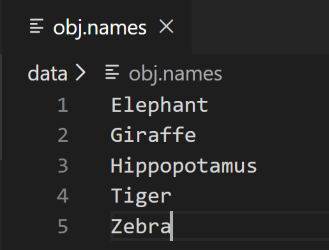

we will also create a **obj.data** file and fill it in like this (change our number of classes accordingly, as well as our backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

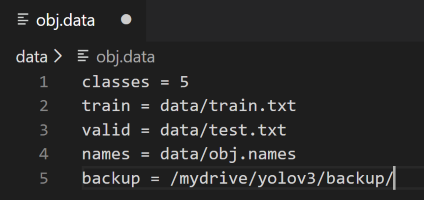



In [13]:
!pwd

/content/darknet


In [17]:

# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [18]:
!ls


3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       video_yolov3.sh
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
cfg		data			net_cam_v4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md


## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

I have created a script that generates train.txt for us.

The script can be accessed from this my drive link which i will share at bottom of this notebook


In [19]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

### rename the folder Human face to obj in the darknet/data folder

In [20]:
!python generate_train.py

In [21]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj1111	     person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.data	     scream.jpg
coco.names  goal.txt	 labels			   obj.names	     train.txt
dog.jpg     horses.jpg	 obj			   openimages.names  voc.names


# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. 

In [22]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-09-28 06:25:19--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-09-28 06:25:19--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   235KB/s    in 12m 4s  

2020-09-28 06:37:24 (219 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train our Custom Object Detector!
we are now ready to train your custom YOLOv3 object detector 
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

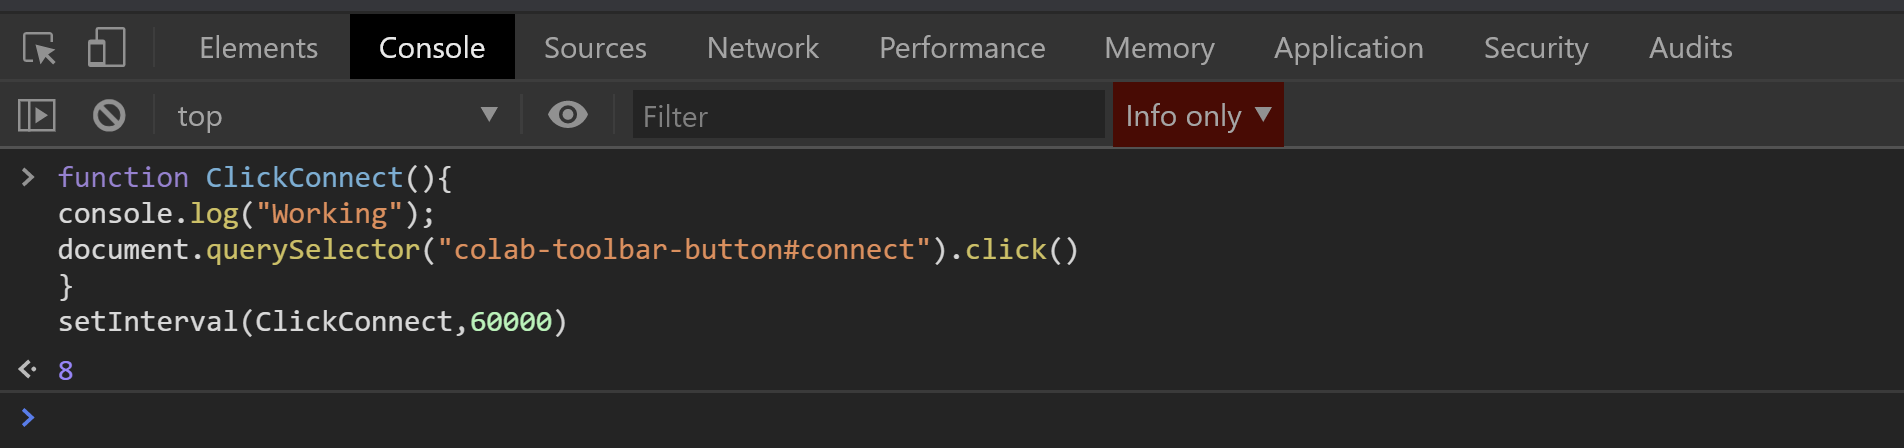

In [27]:
# train  custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.684305, GIOU: 0.655059), Class: 0.479284, Obj: 0.278187, No Obj: 0.478263, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 124.364670, iou_loss = 0.127823, total_loss = 124.492493 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.346188, GIOU: 0.312497), Class: 0.564347, Obj: 0.508387, No Obj: 0.556095, .5R: 0.200000, .75R: 0.000000, count: 10, class_loss = 660.341797, iou_loss = 7.472656, total_loss = 667.814453 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.414285, GIOU: 0.379060), Class: 0.492037, Obj: 0.494976, No Obj: 0.476744, .5R: 0.285714, .75R: 0.000000, count: 7, class_loss = 1950.646362, iou_loss = 4.103271, total_loss = 1954.749634 
 total_bbox = 8595, rewritten_bbox = 0.279232 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.326755, GIOU: 0.326755), Class: 0.615934, Obj: 0.58

we can observe a chart of how our model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [25]:
imShow('chart.png')

AttributeError: ignored

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [24]:
#start training from last saved weight
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_4000.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 10

# Step 6: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [26]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

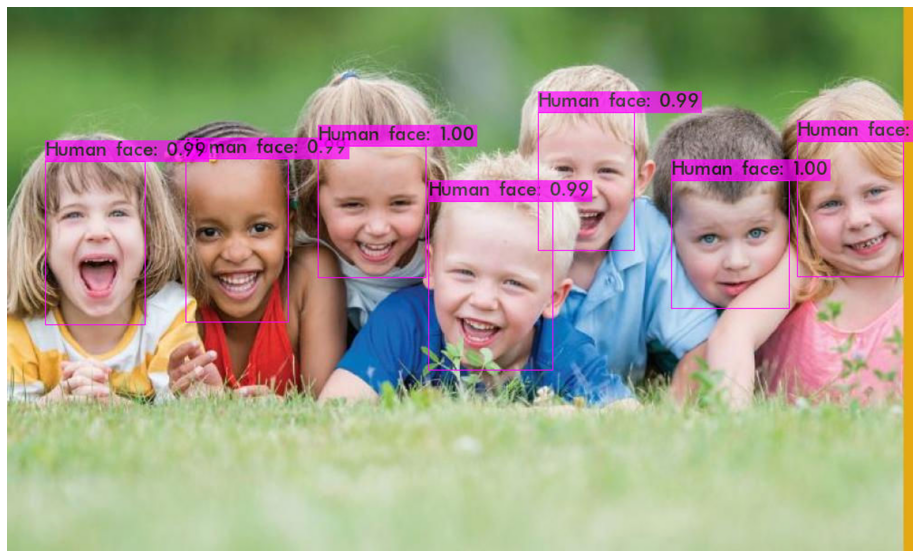

In [28]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_4000.weights /mydrive/yolov3/test/All.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

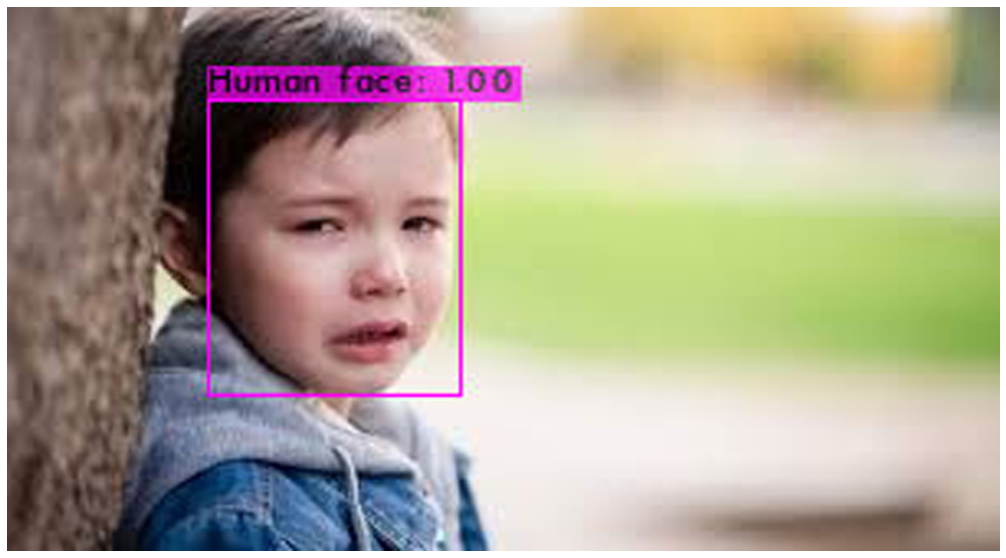

In [29]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_4000.weights /mydrive/yolov3/test/download.jpg -thresh 0.3
imShow('predictions.jpg')